In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,NaN,0.49,0.15,0.5,0.0,NaN,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	185
float64		column 2	111
float64		column 3	185
float64		column 4	37
float64		column 5	0
float64		column 6	0
float64		column 7	74
float64		column 8	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1299.000000,1373.000000,1299.000000,1447.000000,1484.000000,1484.000000,1410.000000,1484.000000
mean,0.501316,0.500561,0.499831,0.260857,0.504717,0.007500,0.499759,0.276199
std,0.136281,0.123751,0.087288,0.137473,0.048351,0.075683,0.058322,0.106491
min,0.170000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.450000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

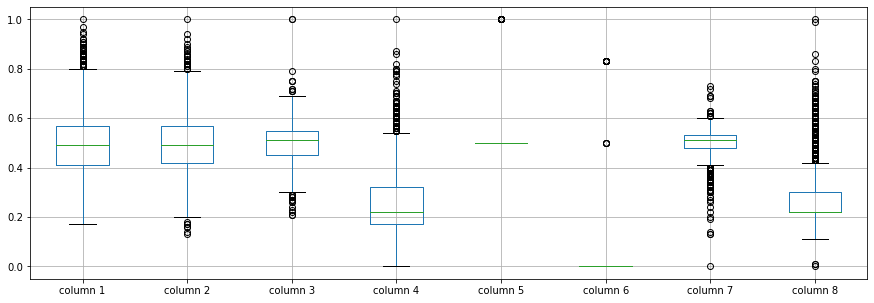

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.501316
column 2    0.500561
column 3    0.499831
column 4    0.260857
column 5    0.504717
column 6    0.007500
column 7    0.499759
column 8    0.276199
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.566170,-0.163050,0.130200,0.037942,0.006064,0.073492,-0.140947
column 2,0.566170,1.000000,-0.303912,0.129432,0.055871,-0.013608,0.104450,-0.099802
column 3,-0.163050,-0.303912,1.000000,0.083643,-0.008914,0.012069,-0.179509,-0.018018
column 4,0.130200,0.129432,0.083643,1.000000,-0.005754,-0.003539,-0.108312,-0.067974
column 5,0.037942,0.055871,-0.008914,-0.005754,1.000000,-0.009674,0.040111,0.002829
column 6,0.006064,-0.013608,0.012069,-0.003539,-0.009674,1.000000,0.019639,-0.035659
column 7,0.073492,0.104450,-0.179509,-0.108312,0.040111,0.019639,1.000000,0.087981
column 8,-0.140947,-0.099802,-0.018018,-0.067974,0.002829,-0.035659,0.087981,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+59,8+59+59,8+59+59+59,8+59+59+59+59,8+59+59+59+59+59,8+59+59+59+59+59+59,8+59+59+59+59+59,8+59+59+59+59,8+59+59+59,8+59+59,8+59,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.69046806252521
Epoch: 1 , loss: 2.2702659018661664
Epoch: 2 , loss: 2.105555473462395
Epoch: 3 , loss: 1.982814863972042
Epoch: 4 , loss: 1.8501002529393071
Epoch: 5 , loss: 1.7821842730045319
Epoch: 6 , loss: 1.6975815205470375
Epoch: 7 , loss: 1.6238680196845012
Epoch: 8 , loss: 1.5420009545657947
Epoch: 9 , loss: 1.500498573417249
Epoch: 10 , loss: 1.4521689103997273
Epoch: 11 , loss: 1.4000907060892687
Epoch: 12 , loss: 1.3798072130783745
Epoch: 13 , loss: 1.3340985917526742
Epoch: 14 , loss: 1.2949917277564174
Epoch: 15 , loss: 1.290866749442142
Epoch: 16 , loss: 1.2407254168520803
Epoch: 17 , loss: 1.2315548852733944
Epoch: 18 , loss: 1.2097329737051674
Epoch: 19 , loss: 1.1746269179427105
Epoch: 20 , loss: 1.1739733756884285
Epoch: 21 , loss: 1.1498068635878356
Epoch: 22 , loss: 1.1493235185094501
Epoch: 23 , loss: 1.1096568787875383
Epoch: 24 , loss: 1.1099445385777431
Epoch: 25 , loss: 1.0970

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,-0.364971,0.0,0.0,0.0,0.0,-0.259623,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1480,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1481,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1482,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4.114274700870648, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.08771665726722762

In [18]:
new_df.iloc[66,:]

column 1    0.630871
column 2    0.490000
column 3    0.634057
column 4    0.230000
column 5    0.500000
column 6    0.000000
column 7    0.440000
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.610000,0.47,0.13,0.5,0.0,0.480000,0.22
1,0.43,0.670000,0.48,0.27,0.5,0.0,0.530000,0.22
2,0.64,0.255029,0.49,0.15,0.5,0.0,0.270377,0.22
3,0.58,0.440000,0.57,0.13,0.5,0.0,0.540000,0.22
4,0.42,0.440000,0.48,0.54,0.5,0.0,0.480000,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.630000,0.47,0.18,0.5,0.0,0.500000,0.22
1480,0.35,0.290000,0.46,0.14,0.5,0.0,0.540000,0.66
1481,0.41,0.470000,0.50,0.14,0.5,0.0,0.530000,0.37
1482,0.51,0.450000,0.62,0.25,0.5,0.0,0.590000,0.22


In [20]:
imputations[-1].to_excel("Yeast_AW_5(imp).xlsx", index=False, header=False)